In [1]:
from IPython.display import clear_output
from datetime import datetime

import os
if "SCRATCH" not in os.environ:
    os.environ["SCRATCH"] = "/mnt/c/Users/sebas/OneDrive/SCRATCH"
from os.path import join as opj

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt


import delensalot
from delensalot.run import run
from delensalot.utils import cli
from delensalot import cachers, n0n1_iterative
from delensalot.lerepi.visalot.plot_helper import movavg, phi2kappa_bp
from delensalot.lerepi.config.config_helper import data_functions as df
from delensalot.utils_hp import alm_copy, almxfl
from delensalot.utils_hp import gauss_beam
from delensalot.lerepi.visalot import plot_helper as ph


fn = opj(os.getcwd(), 'conf_defaults.py')



cond4mpi does not exists. No MPI loaded
use Plancklens MPI? False
could not setup healpix hack. reverting to standard healpy
/mnt/c/Users/sebas/OneDrive/SCRATCH


In [4]:
a = {1: 2}
b = {2: 3}

c = dict({'a':a, 'b':b})

In [5]:
c

{'a': {1: 2}, 'b': {2: 3}}

In [2]:
drun = run(config=fn, job_id='generate_sim', verbose=True)
# ana_mwe = drun.run()

INFO:: 03-07 17:36:: delensalot.lerepi.core.handler.log - load_configfile() Started: /mnt/c/Users/sebas/OneDrive/Desktop/Uni/ext/git/delensalot/notebooks/examples/conf_defaults.py
meta version meta NAV
INFO:: 03-07 17:36:: delensalot.lerepi.core.handler.log - load_configfile() Finished
INFO:: 03-07 17:36:: delensalot.lerepi.core.handler.log - store() Started
INFO:: 03-07 17:36:: delensalot.lerepi.core.handler.log - load_configfile() Started: /mnt/c/Users/sebas/OneDrive/SCRATCH/delensalot/generic/sims_cmb_len_lminB10_default/conf_defaults.py
INFO:: 03-07 17:36:: delensalot.lerepi.core.handler.log - load_configfile() Finished
INFO:: 03-07 17:36:: root.store - config file comparison done. No conflicts found.
INFO:: 03-07 17:36:: root.store - Matching config file found. Resuming where I left off.
INFO:: 03-07 17:36:: delensalot.lerepi.core.handler.log - store() Finished
INFO:: 03-07 17:36:: delensalot.lerepi.core.handler.log - build_model() Started
INFO:: 03-07 17:36:: delensalot.lerepi.co

In [3]:
ana_mwe = drun.run()

INFO:: 03-07 17:30:: delensalot.lerepi.core.handler.log - init_job() Started
ERROR: HASHCHECK FAIL AT KEY = lmax
   UNEQUAL VALUES
    V1 =  5120
    V2 =  2048


AssertionError: 

In [ ]:
drun = run(config=fn, job_id='QE_lensrec', verbose=True)
drun.init_job()

clear_output(wait=True)
print("Cell finished {}".format(datetime.now().strftime("%H:%M:%S")))

(2e-08, 2e-07)

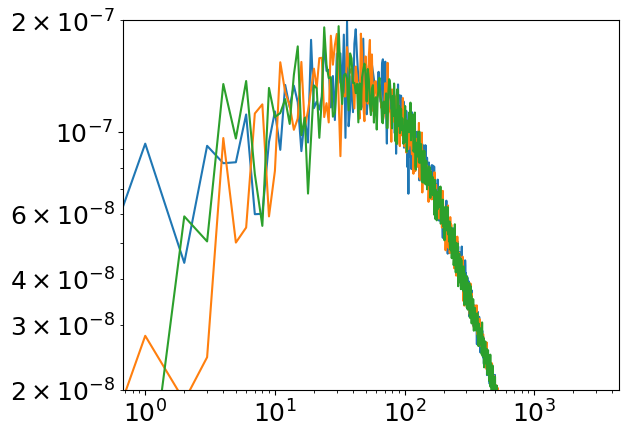

In [35]:
ll = np.arange(0,ana_mwe.qe_lm_max_qlm[0]+1,1)
scale_factor = (ll*(ll+1))**2/(2*np.pi)
plt.plot(scale_factor*hp.alm2cl(ana_mwe._sims.get_sim_plm(0))[:3001])
plt.plot(scale_factor*hp.alm2cl(ana_mwe._sims.get_sim_plm(1))[:3001])
plt.plot(scale_factor*hp.alm2cl(ana_mwe._sims.get_sim_plm(2))[:3001])
plt.loglog()
plt.ylim(2e-8,2e-7)

# iterative lensing reconstruction

The following cell repeats above, but for the iterative case. The number of iterations is defined in `DLENSALOT_Itrec.itmax`.
For the iterative Wiener-filtering we use approximate solutions, allowing us to get fast results in this tutorial's idealized setting.

In [3]:
ana_mwe = run(config=fn, job_id='MAP_lensrec', verbose=True)
ana_mwe.run()

clear_output(wait=True)
print("Cell finished {}".format(datetime.now().strftime("%H:%M:%S")))

INFO:: 03-05 20:13:: delensalot.lerepi.core.handler.log - load_configfile() Started: /mnt/c/Users/sebas/OneDrive/Desktop/Uni/ext/git/delensalot/notebooks/examples/conf_simgen.py
INFO:: 03-05 20:13:: delensalot.lerepi.core.handler.log - load_configfile() Finished
INFO:: 03-05 20:13:: delensalot.lerepi.core.handler.log - store() Started
INFO:: 03-05 20:13:: delensalot.lerepi.core.handler.log - load_configfile() Started: /mnt/c/Users/sebas/OneDrive/SCRATCH/delensalot/generic/sims_cmb_len_lminB200_simgen/conf_simgen.py
INFO:: 03-05 20:13:: delensalot.lerepi.core.handler.log - load_configfile() Finished
INFO:: 03-05 20:13:: root.store - config file comparison done. No conflicts found.
INFO:: 03-05 20:13:: root.store - Matching config file found. Resuming where I left off.
INFO:: 03-05 20:13:: delensalot.lerepi.core.handler.log - store() Finished
INFO:: 03-05 20:13:: delensalot.core.mpi.inner_function - rank: 0, size: 1, name: x86_64 with 12 cpus
INFO:: 03-05 20:13:: delensalot.lerepi.core.h

KeyboardInterrupt: 

# Check your results
## lensing potential
After completion of above cells, you may want to see the reconstructed lensing potential.
`get_plm_it(idx, its)` returns the spherical harmonics for simulation `idx` and iterations `its`.

In [10]:
def get_N0_N1_iter(self, itermax=10, version="wE"):
    self.config = (
        self.nlev_t,
        self.nlev_p,
        self._sims.beam,
        self.lmin_teb,
        self.lm_max_ivf[0],
        self.it_lm_max_qlm[0],
    )
    self.cacher_param = cachers.cacher_npy(opj(self.TEMP, "cpplib"))
    iterbiases = n0n1_iterative.polMAPbiases(
        self.config,
        fidcls_unl=self.cls_unl,
        itrmax=itermax,
        cacher=self.cacher_param
    )
    N0_biased, N1_biased_spl, r_gg_fid, r_gg_true = iterbiases.get_n0n1(
        cls_unl_true=None,
        cls_noise_true=None,
        version=version
    )
    return N0_biased, N1_biased_spl, r_gg_fid, r_gg_true
ana_mwe.N0_QE, ana_mwe.N1_QE, _, _ = get_N0_N1_iter(ana_mwe, 0)
ana_mwe.N0_MAP, ana_mwe.N1_MAP, _, _ = get_N0_N1_iter(ana_mwe, ana_mwe.itmax)
ana_mwe.WF_MAP_cpp = (ana_mwe.cpp * utils.cli(ana_mwe.cpp + ana_mwe.N0_MAP + ana_mwe.N1_MAP))[:ana_mwe.it_lm_max_qlm[0] + 1]

R_fid = qresp.get_response(
        ana_mwe.k,
        ana_mwe.lm_max_ivf[0],
        ana_mwe.k[0],
        ana_mwe.cls_len,
        ana_mwe.cls_len,
        ana_mwe.ftebl_len,
        lmax_qlm=ana_mwe.qe_lm_max_qlm[0])[0]

INFO:: 02-24 01:55:: lenscarf.core.handler.log - get_plm_it(simidx=0, its=[0]) started
INFO:: 02-24 01:55:: lenscarf.core.handler.log - get_plm_it(simidx=0, its=[0]) finished
INFO:: 02-24 01:55:: lenscarf.core.handler.log - get_sim_qlm(simidx=0) started
INFO:: 02-24 01:55:: lenscarf.core.handler.log - get_sim_qlm(simidx=0) finished
INFO:: 02-24 01:55:: lenscarf.core.handler.log - get_plm_it(simidx=0, its=[5]) started
INFO:: 02-24 01:55:: lenscarf.core.handler.log - get_plm_it(simidx=0, its=[5]) finished


/tmp/ipykernel_1742/399448863.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.plot(movavg(scale_factor*hp.alm2cl(plm_MAP)/ana_mwe.WF_MAP_cpp, 5), label=r'$C_L^{\hat{\phi}^{\rm MAP}\hat{\phi}^{\rm MAP}}$')
/tmp/ipykernel_1742/399448863.py:10: RuntimeWarning: invalid value encountered in divide
  plt.plot(movavg(scale_factor*hp.alm2cl(plm_MAP)/ana_mwe.WF_MAP_cpp, 5), label=r'$C_L^{\hat{\phi}^{\rm MAP}\hat{\phi}^{\rm MAP}}$')


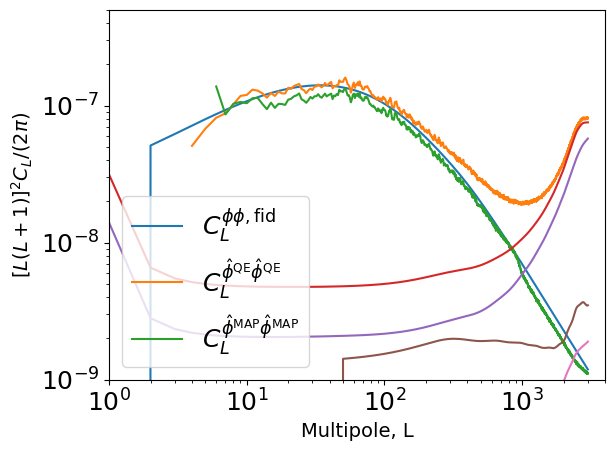

In [22]:
plm_QE = ana_mwe.get_plm_it(0, [0])[0]
qlm_QE = ana_mwe.qe.get_sim_qlm(0)
plm_MAP = ana_mwe.get_plm_it(0, [ana_mwe.itmax])[0]

ll = np.arange(0,ana_mwe.qe_lm_max_qlm[0]+1,1)
scale_factor = (ll*(ll+1))**2/(2*np.pi)

plt.plot(scale_factor*ana_mwe.cpp, label=r'$C_L^{\phi\phi,{\rm fid}}$')
plt.plot(movavg(scale_factor*hp.alm2cl(hp.almxfl(qlm_QE,utils.cli(R_fid))), 5), label=r'$C_L^{\hat{\phi}^{\rm QE}\hat{\phi}^{\rm QE}}$')
plt.plot(movavg(scale_factor*hp.alm2cl(plm_MAP)/ana_mwe.WF_MAP_cpp, 5), label=r'$C_L^{\hat{\phi}^{\rm MAP}\hat{\phi}^{\rm MAP}}$')
plt.plot(scale_factor*ana_mwe.N0_QE)
plt.plot(scale_factor*ana_mwe.N0_MAP)
plt.plot(scale_factor*ana_mwe.N1_QE)
plt.plot(scale_factor*ana_mwe.N1_MAP)
plt.legend(fontsize=18, loc='lower left')
plt.xlabel('Multipole, L', fontsize=14)
plt.ylabel(r'$\left[L(L+1)\right]^2C_L/(2\pi)$', fontsize=14)
plt.xscale('log')
plt.xlim(1,4e3)
plt.ylim(1e-9,5e-7)
plt.yscale('log')

In [ ]:
plm_QE = ana_mwe.get_plm_it(0, [0])[0]
plm_MAP = ana_mwe.get_plm_it(0, [ana_mwe.itmax])[0]

ll = np.arange(0,ana_mwe.qe_lm_max_qlm[0]+1,1)
scale_factor = (ll*(ll+1))**2/(2*np.pi)

plt.plot(scale_factor*ana_mwe.cpp, label=r'$C_L^{\phi\phi,{\rm fid}}$')
plt.plot(scale_factor*hp.alm2cl(plm_QE), label=r'$C_L^{\hat{\phi}^{\rm QE}\hat{\phi}^{\rm QE}}$')
plt.plot(scale_factor*hp.alm2cl(plm_MAP), label=r'$C_L^{\hat{\phi}^{\rm MAP}\hat{\phi}^{\rm MAP}}$')

plt.legend(fontsize=18, loc='lower left')
plt.xlabel('Multipole, L', fontsize=14)
plt.ylabel(r'$\left[L(L+1)\right]^2/(2\pi)$', fontsize=14)
plt.xscale('log')
plt.xlim(1,1e3)
plt.ylim(1e-9,5e-7)
plt.yscale('log')

The blue line is the input lensing potential. The QE and MAP estimates are shown in orange and green, and they agree well with the input.

You can also compare them on map-level. We bandpass the multipoles to make the similarities more apparent

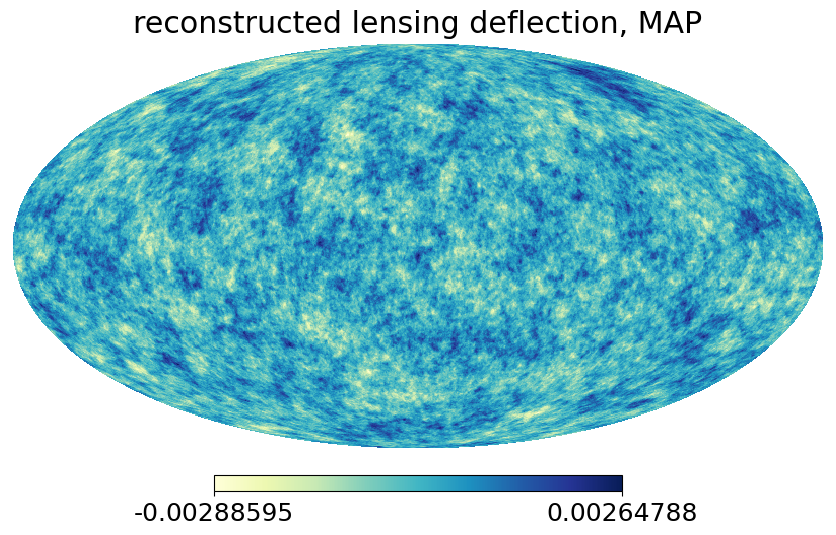

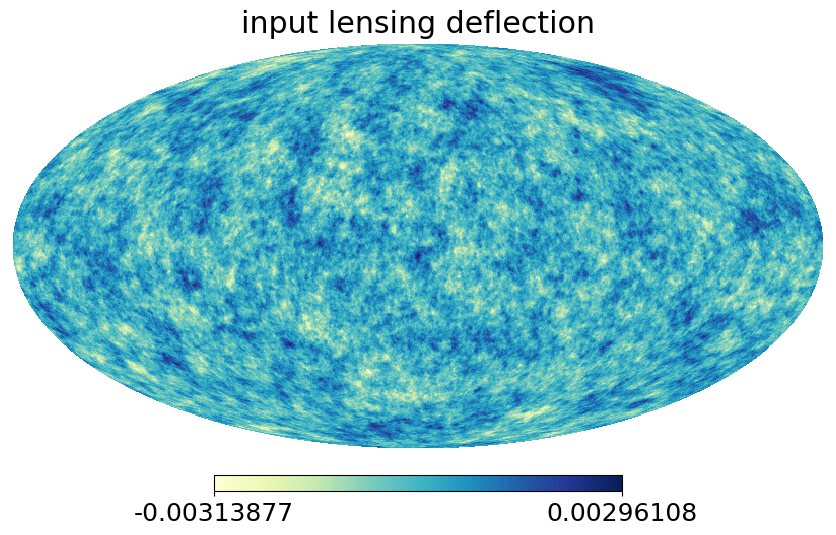

In [14]:
hp.mollview(hp.alm2map(ph.bandpass_alms(hp.almxfl(plm_MAP,np.sqrt(ll*(ll+1))),5,1000), nside=512), title='reconstructed lensing deflection, MAP', cmap='YlGnBu')
hp.mollview(hp.alm2map(ph.bandpass_alms(hp.almxfl(ana_mwe._sims.get_sim_plm(0),np.sqrt(ll*(ll+1))),5,1000), nside=2048), title='input lensing deflection', cmap='YlGnBu')

# Delensed spectrum
For both QE and iterative lensing reconstruction, D.lensalot already calculated the B-lensing templates. You can use them to delens the B-lensing maps and obtain residual maps

In [5]:
input_blensing = hp.map2alm(hp.alm2map(ana_mwe._sims.get_sim_blm(0), nside=2048), lmax=1024)
blt_QE = ana_mwe.get_blt_it(0, 0)
blt_MAP = ana_mwe.get_blt_it(0, ana_mwe.itmax)

INFO:: 02-24 00:21:: lenscarf.core.handler.log - get_blt_it(simidx=0, it=0) started
INFO:: 02-24 00:21:: lenscarf.iterators.cs_iterator.log - get_template_blm(it=0) started
INFO:: 02-24 00:21:: lenscarf.iterators.cs_iterator.log - get_template_blm(it=0) finished
INFO:: 02-24 00:21:: lenscarf.core.handler.log - get_blt_it(simidx=0, it=0) finished
INFO:: 02-24 00:21:: lenscarf.core.handler.log - get_blt_it(simidx=0, it=5) started
INFO:: 02-24 00:21:: lenscarf.iterators.cs_iterator.log - get_template_blm(it=5) started
INFO:: 02-24 00:21:: lenscarf.iterators.cs_iterator.log - get_template_blm(it=5) finished
INFO:: 02-24 00:21:: lenscarf.core.handler.log - get_blt_it(simidx=0, it=5) finished


In [6]:
blens_residual_QE = input_blensing - blt_QE
blens_residual_MAP = input_blensing - blt_MAP

## Prediction
D.lensalot can predict the residual lensing amplitude.
To compare this to the expection, we calculate N0 (and N1 for QE) and use this to calculate the delensing efficiency.

In [7]:
from camb.correlations import lensed_cls
from plancklens import n0s, utils

lmin_teb = dict({k:v for k,v in zip(['t', 'e', 'b'], ana_mwe.lmin_teb)})
N0_QE = n0s.get_N0(
    beam_fwhm=ana_mwe._sims.beam,
    nlev_t=ana_mwe.nlev_t,
    nlev_p=ana_mwe.nlev_p,
    lmax_CMB=ana_mwe.lm_max_ivf[0],
    lmin_CMB=lmin_teb,
    )

Cls_del_MAP = n0s.get_N0_iter(
    qe_key='p_p',
    nlev_t=ana_mwe.nlev_t,
    nlev_p=ana_mwe.nlev_p,
    beam_fwhm=ana_mwe._sims.beam,
    cls_unl_fid=ana_mwe.cls_unl,
    lmin_cmb=lmin_teb,
    lmax_cmb=ana_mwe.lm_max_ivf[0],
    itermax=ana_mwe.itmax,
    cls_unl_dat=None,
    lmax_qlm=ana_mwe.qe_lm_max_qlm[0],
    ret_delcls=True)

lmax_qlm = ana_mwe.qe_lm_max_qlm[0]
def cls2dls(cls):
    """Turns cls dict. into camb cl array format"""
    keys = ['tt', 'ee', 'bb', 'te']
    lmax = np.max([len(cl) for cl in cls.values()]) - 1
    dls = np.zeros((lmax + 1, 4), dtype=float)
    refac = np.arange(lmax + 1) * np.arange(1, lmax + 2, dtype=float) / (2. * np.pi)
    for i, k in enumerate(keys):
        cl = cls.get(k, np.zeros(lmax + 1, dtype=float))
        sli = slice(0, min(len(cl), lmax + 1))
        dls[sli, i] = cl[sli] * refac[sli]
    cldd = np.copy(cls.get('pp', None))
    if cldd is not None:
        cldd *= np.arange(len(cldd)) ** 2 * np.arange(1, len(cldd) + 1, dtype=float) ** 2 /  (2. * np.pi)
    return dls, cldd

def dls2cls(dls):
    """Inverse operation to cls2dls"""
    assert dls.shape[1] == 4
    lmax = dls.shape[0] - 1
    cls = {}
    refac = 2. * np.pi * utils.cli( np.arange(lmax + 1) * np.arange(1, lmax + 2, dtype=float))
    for i, k in enumerate(['tt', 'ee', 'bb', 'te']):
        cls[k] = dls[:, i] * refac
    return cls

def get_cl_plen(dls_unl_true, cldd_true, N0, N1):
    rho =  np.zeros(len(cldd_true))
    if N1 is None: N1 = np.zeros(len(cldd_true))
    rho[:lmax_qlm + 1] =  cldd_true[:lmax_qlm + 1] * utils.cli(cldd_true[:lmax_qlm + 1] + llp2 * (N0[:lmax_qlm+1] + N1[:lmax_qlm + 1]))
    cpp_del = cldd_true * (1 - rho)
    return dls2cls(lensed_cls(dls_unl_true, cpp_del))['bb']


dls_unl_true, cldd_true = cls2dls(ana_mwe.cls_unl)
llp2 = np.arange(lmax_qlm + 1, dtype=float) ** 2 * np.arange(1, lmax_qlm + 2, dtype=float) ** 2 / (2. * np.pi)
cl_del_QE = get_cl_plen(dls_unl_true, cldd_true, N0_QE[0]['p_p'], np.ones_like(N0_QE[0]['p_p'])*1.8e-9/scale_factor)

QE_pred = np.mean((cl_del_QE[30:200]/ana_mwe.cls_len['bb'][30:200]))
MAP_pred = np.mean((Cls_del_MAP[-1][-1]['bb'][30:200]/ana_mwe.cls_len['bb'][30:200]))

Seeing lmin's:
t: 2
e: 2
b: 200
Seeing lmin's:
t: 2
e: 2
b: 200
 [00:00:18]  --------> 83%


/tmp/ipykernel_1132/858921295.py:62: RuntimeWarning: divide by zero encountered in divide
  cl_del_QE = get_cl_plen(dls_unl_true, cldd_true, N0_QE[0]['p_p'], np.ones_like(N0_QE[0]['p_p'])*1.8e-9/scale_factor)
/tmp/ipykernel_1132/858921295.py:55: RuntimeWarning: invalid value encountered in multiply
  rho[:lmax_qlm + 1] =  cldd_true[:lmax_qlm + 1] * utils.cli(cldd_true[:lmax_qlm + 1] + llp2 * (N0[:lmax_qlm+1] + N1[:lmax_qlm + 1]))


## Plot
 * residual lensing amplitude $A_{\rm lens}$
 
A simple estimate of the reduction of lensing power is to take the ratio between the input and resdiual B-lensing signal, averaged across the scales of interest. Here, we simply take the scales about the recombination peak

~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.
nlev_p: 1.414, lmax_ivf: (3000, 3000), beam: 1.0 arcmin 
A_{lens}^{QE}	 empiric: 0.303	 predicted: 0.303
A_{lens}^{MAP}	 empiric: 0.191	 predicted: 0.175
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.


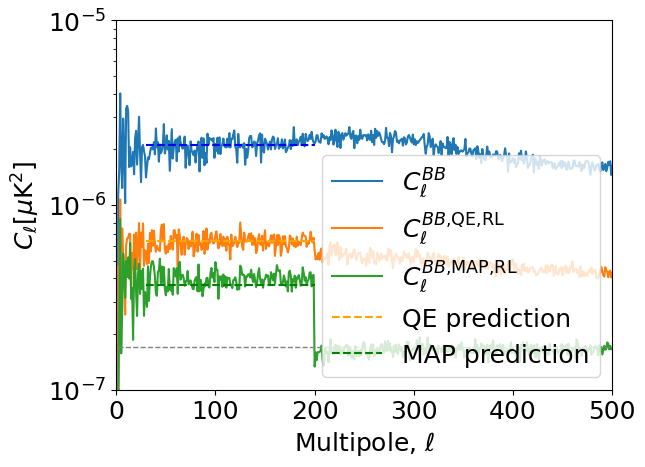

In [12]:
plt.plot(hp.alm2cl(input_blensing, lmax_out=1000), label=r'$C_\ell^{BB}$')
plt.plot(hp.alm2cl(blens_residual_QE, lmax_out=1000), label=r'$C_\ell^{BB{,}{\rm QE{,}RL}}$')
plt.plot(hp.alm2cl(blens_residual_MAP, lmax_out=1000), label=r'$C_\ell^{BB{,}{\rm MAP{,}RL}}$')


plt.hlines(np.mean(hp.alm2cl(input_blensing, lmax_out=210)[30:200]),30,200, color='blue', ls='--')
plt.hlines(QE_pred*np.mean(hp.alm2cl(input_blensing, lmax_out=210)[30:200]), 30,200, color='orange', ls='--', label='QE prediction')
plt.hlines(MAP_pred*np.mean(hp.alm2cl(input_blensing, lmax_out=210)[30:200]), 30,200, color='green', ls='--', label='MAP prediction')

plt.hlines((ana_mwe.nlev_p/60/180*np.pi)**2,2,500, color='grey', lw=1,ls='--')
plt.legend(loc='lower right')
plt.yscale('log')
plt.xlim(0,500)
plt.ylim(1e-7,1e-5)
plt.xlabel('Multipole, $\ell$')
plt.ylabel('$C_\ell [\mu $'+r'$\rm{K}^2$]')

print(20*'~.')
print('nlev_p: {:.3f}, lmax_ivf: {}, beam: {} arcmin '.format(ana_mwe.nlev_p, ana_mwe.lm_max_ivf, ana_mwe._sims.beam))
print('A_{lens}^{QE}\t empiric: '+'{:.3f}\t predicted: {:.3f}'.format(np.mean((hp.alm2cl(blens_residual_QE, lmax_out=200)/hp.alm2cl(input_blensing, lmax_out=200))[30:199]), QE_pred))
print('A_{lens}^{MAP}\t empiric: '+'{:.3f}\t predicted: {:.3f}'.format(np.mean((hp.alm2cl(blens_residual_MAP, lmax_out=200)/hp.alm2cl(input_blensing, lmax_out=200))[30:199]), MAP_pred))
print(20*'~.')

# Summary and next steps
This tutorial demonstrated the usage of D.lensalot in an idealized setting, and you obtained lensing potential estimates and residual lensing amplitudes from simulation data generated upon runtime.

D.lensalot can also perfrom lensing reconstruction on more challenging settings such as,

 * masked sky,
 * inhomogeneous noise,
 * data inclusive of foreground (residuals).
 

It also has MPI support.
 
Please check out the other tutorials, or see the [documentation](link_to_rtd_doc), or [github](https://github.com/NextGenCMB/D.lensalot) for more.